## Data Description:
  | Column Name           | Description                                                                                      |
  | ----------------------|--------------------------------------------------------------------------------------------------|            
  | **Earliest_cr_line** |``The month the borrower's earliest reported credit line was opened``<br>                          |
  | **Emp_title**  |``The job title supplied by the Borrower when applying for the loan.``<br>                                              |
  | **Fico_range_high**  |``The upper boundary range the borrower’s FICO at loan origination belongs to.``<br>                              |
  | **Fico_range_low**  |``The lower boundary range the borrower’s FICO at loan origination belongs to.``<br>                                |
  | **Grade**  |``LC assigned loan grade``<br>                                                                                               |
  | **Application_type**  |``Indicates whether the loan is an individual application or a joint application with two co-borrowers.``<br>|
  | **Initial_list_status** |``The initial listing status of the loan. Possible values are – W, F``<br>|
  | **Num_actv_bc_tl**  |``Number of currently active bankcard accounts.``<br>|
  |  **Mort_acc**  |``Number of mortgage accounts.``<br>|
  | **Tot_cur_bal**  |``Total current balance of all accounts.``<br>|
  | **Open_acc**  |``The number of open credit lines in the borrower's credit file.``<br>|
  | **Pub_rec** |``Number of derogatory public records.``<br>|
  | **pub_rec_bankruptcies** |``Number of public record bankruptcies.``<br>|
  | **Purpose** |``A category provided by the borrower for the loan request.``<br>|
  | **revol_bal** |``Total credit revolving balance``<br>|
  | **Title** |``The loan title provided by the borrower``<br>|
  | **total_acc** |``The total number of credit lines currently in the borrower's credit file.``<br>|
  | **verification_status** |``Indicates if income was verified by LC, not verified, or if the income source was verified.``<br>|
  | **addr_state** |``The state provided by the borrower in the loan application.``<br>|
  | **annual_inc** |``The self-reported annual income provided by the borrower during registration.``<br>|
  | **emp_length** |``Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.``<br>|
  | **home_ownership** |``The home ownership status provided by the borrower during registration.Our values are: RENT, OWN, MORTGAGE, OTHER.``<br>|
  | **int_rate** |``Interest Rate on the loan``<br>|
  | **loan_amnt** |``The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.``<br>|
  | **sub_grade** |``LC assigned loan subgrade.``<br>|
  | **Term** |``The number of payments on the loan. Values are in months and can be either 36 or 60.``<br>|
  | **revol_util** |``Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.``<br>|
  | **Target** |``loan_status :Status of the loan.<br>``|

# <p id="1" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #F3D7CA; font-size: 20px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">1: Import Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

# <p id="1" style="text-align: center; padding: 20px; background-color: #E8F0FE ; border-radius: 10px; border: 2px solid #F3D7CA; font-size: 20px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">2: Data Preparation </p>

In [2]:
#changing the directory
os.chdir("C:/Users/HP/OneDrive/Desktop/hack")

In [3]:
# importing the test and train dataset
df_train = pd.read_csv("train_loan_data.csv")
df_test = pd.read_csv("test_loan_data.csv")

In [4]:
pd.set_option("display.max_columns",29)

In [5]:
# first five rows 
df_train.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,w,18.99,18075,1.0,1.0,319479.0,7,0,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,w,10.16,8800,4.0,0.0,19944.0,5,0,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,w,11.47,18000,4.0,2.0,23199.0,7,0,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,w,9.16,20000,4.0,1.0,72651.0,12,0,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,f,23.83,35000,14.0,7.0,64631.0,23,0,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


# <p id="1" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #F3D7CA; font-size: 20px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3: Data Prepration</p>
 - 3.1 Understainding the data <br>
 - 3.2 Descriptive Statistics <br>
 - 3.3 Exploratory Data Analysis <br>
 - 3.4 Missing value Treatment <br>
 - 3.5 Outlier Treatment <br>
 - 3.6 Encoding <br>
 - 3.7 Splitting the data into Train and Test

# <p id="1" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #7AA2E3; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3.1: Understanding the Data</p>

In [6]:
# Missing values and dtypes of columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

<div style="background-color: #f0cccc; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    
<b>Inference</b>:<br>
<ul style="list-style-type: square; color: #004085;">
    <li>The dataset contains <b>80000</b> entries.</li>
    <li>Each entry represents a loan application.</li>
    <li>There are <b>28</b> columns in the dataset.</li>
    <li>The columns represent various features such as:</li>
    <ul style="list-style-type: disc; color: #004085;">
        <li>State of the borrower's address (addr_state)</li>
        <li>Annual income (annual_inc)</li>
        <li>Earliest reported credit line (earliest_cr_line)</li>
        <li>Employment length (emp_length)</li>
        <li>Job title (emp_title)</li>
        <li>FICO score range (fico_range_high, fico_range_low)</li>
        <li>Loan grade (grade)</li>
        <li>Home ownership status (home_ownership)</li>
        <li>Application type (application_type)</li>
        <li>Initial listing status (initial_list_status)</li>
        <li>Interest rate (int_rate)</li>
        <li>Loan amount (loan_amnt)</li>
        <li>Number of active bankcard accounts (num_actv_bc_tl)</li>
        <li>Number of mortgage accounts (mort_acc)</li>
        <li>Total current balance of all accounts (tot_cur_bal)</li>
        <li>Number of open credit lines (open_acc)</li>
        <li>Number of derogatory public records (pub_rec)</li>
        <li>Number of public record bankruptcies (pub_rec_bankruptcies)</li>
        <li>Loan purpose (purpose)</li>
        <li>Total credit revolving balance (revol_bal)</li>
        <li>Revolving line utilization rate (revol_util)</li>
        <li>Loan subgrade (sub_grade)</li>
        <li>Term of the loan (term)</li>
        <li>Loan title (title)</li>
        <li>Total number of credit lines (total_acc)</li>
        <li>Income verification status (verification_status)</li>
        <li>Loan status (loan_status)</li>
        <li>Loan type (type)</li>
    </ul>
        <li>There are missing values in several columns such as:</li>
    <ul style="list-style-type: disc; color: #004085;">
        <li>Employment length (emp_length)</li>
        <li>Job title (emp_title)</li>
        <li>Number of active bankcard accounts (num_actv_bc_tl)</li>
        <li>Number of mortgage accounts (mort_acc)</li>
        <li>Total current balance of all accounts (tot_cur_bal)</li>
        <li>Number of public record bankruptcies (pub_rec_bankruptcies)</li>
        <li>Revolving line utilization rate (revol_util)</li>
        <li>Loan title (title)</li>
        <li>Loan status (loan_status)</li>
    </ul>
    <li>The target variable is '<b>loan_status</b>', which represents the status of the loan application.</li>
    <li>The features include a mix of numerical (float64) and categorical (object) data types.</li>
    <li>The dataset requires handling missing values before proceeding with analysis or modeling.</li>
</ul>
    
</div>


In [7]:
#length of the data
len(df_train)

80000

In [8]:
# shape of the train data
df_train.shape

(80000, 28)

In [9]:
# shape of test data
df_test.shape

(20000, 27)

In [10]:
# No. of columns in train data
df_train.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [11]:
# Count of total columns in train data
len(df_train.columns)

28

In [12]:
# count of columns in test data
len(df_test.columns)

27

In [13]:
#No. of duplicate values in train data
df_train.duplicated().sum()

0

In [14]:
# No. of duplicate values in test data
df_test.duplicated().sum()

0

# <p id="1" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #7AA2E3; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3.2: Descriptive Statistics</p>



In [15]:
# statistics summary for Numerical Features
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_inc,80000.0,76046.143138,69020.055377,0.00,46000.00,65000.00,90000.00,7141778.00
fico_range_high,80000.0,699.987975,31.734840,664.00,674.00,694.00,714.00,850.00
fico_range_low,80000.0,695.987813,31.734075,660.00,670.00,690.00,710.00,845.00
int_rate,80000.0,13.232898,4.771705,5.31,9.75,12.74,15.99,30.99
loan_amnt,80000.0,14403.867813,8703.826298,750.00,7925.00,12000.00,20000.00,40000.00
num_actv_bc_tl,76052.0,3.633790,2.262505,0.00,2.00,3.00,5.00,32.00
mort_acc,77229.0,1.674759,2.005104,0.00,0.00,1.00,3.00,32.00
tot_cur_bal,76052.0,141586.358991,159371.366632,0.00,29642.00,81000.50,211027.25,5172185.00
open_acc,80000.0,11.605675,5.483362,1.00,8.00,11.00,14.00,80.00
pub_rec,80000.0,0.216675,0.579854,0.00,0.00,0.00,0.00,24.00


<div style="background-color: #F5EEE6; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <b>Inference</b>:<br>
    <ul style="list-style-type: square; color: #004085;">
        <li><b>Annual Income:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The average annual income of loan applicants is approximately <b>\$76,046</b>, with a considerable standard deviation of <b>\$69020</b>. This indicates a wide range of income levels among applicants.</li>
                <li>The maximum reported income is significantly high at <b>\$7,141,778</b>, which could represent outliers or high-income individuals.</li>
            </ul>
        </li>
        <li><b>Interest Rate:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The average interest rate on loans is approximately <b>13.23%</b>, with a standard deviation of <b>4.77%</b>. This signifies the range of interest rates offered to borrowers.</li>
                <li>Interest rates range from <b>5.31%</b> to <b>30.99%</b>, with most falling between <b>9.75%</b> and <b>15.99%</b>. This indicates variability in loan pricing based on factors like creditworthiness and market conditions.</li>
            </ul>
        </li>
        <li><b>Loan Amount:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The average loan amount requested is <b>\$14,404</b>, with a standard deviation of <b>\$8,704</b>. This suggests variability in loan sizes among applicants.</li>
                <li>Loan amounts range from <b>\$750</b> to <b>\$40,000</b>, with the majority between <b>\$7,925</b> and <b>\$20,000</b>.</li>
            </ul>
        </li>
        <li><b>Other Numerical Features:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>Features like'<b>revol_bal</b>', and '<b>revol_util</b>',  also exhibit variability in their distributions, indicating diversity among applicants in terms of their credit and financial profiles.</li>
            </ul>
        </li>
    </ul>
</div>


In [16]:
# Statistics Summary for Categorical Features
df_train.describe(include="O")

,addr_state,earliest_cr_line,emp_length,emp_title,grade,home_ownership,application_type,initial_list_status,purpose,sub_grade,term,title,verification_status,loan_status
count,80000,80000,75412,74982,80000,80000,80000,80000,80000,80000,80000,79030,80000,80000
unique,51,640,11,36661,7,6,2,2,14,35,2,5348,3,2
top,CA,Sep-03,10+ years,Teacher,B,MORTGAGE,Individual,w,debt_consolidation,C1,36 months,Debt consolidation,Source Verified,Paid
freq,11744,547,26278,1278,23502,39628,78446,46745,46418,4982,60750,39396,30855,64030


<div style="background-color: #F5EEE6; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <b>Inference</b>:<br>
    <ul style="list-style-type: square; color: #004085;">
        <li><b>Address State:</b> There are <b>51</b> unique states represented in the dataset, with <b>CA</b> being the most frequent state, occurring <b>11744</b> times. This indicates that a significant number of loan applicants are from California.</li>
        <li><b>Earliest Credit Line:</b> The feature represents the month and year when the borrower's earliest reported credit line was opened. It has <b>640</b> unique values, with the most common being <b>Sep-03</b>, occurring <b>547</b> times.</li>
        <li><b>Employment Length:</b> This feature indicates the length of employment in years. The most frequent value is <b>10+ years</b>, occurring <b>26278</b> times, suggesting that many applicants have long-term employment.</li>
        <li><b>Employment Title:</b> There are <b>36661</b> unique employment titles, with <b>Teacher</b> being the most common, occurring <b>1278</b> times. This indicates a wide variety of job titles among loan applicants.</li>
        <li><b>FICO Score Range:</b> The FICO score range reported by applicants ranges from <b>660</b> to <b>850</b>, with the average high score being <b>664</b> and the average low score being <b>660</b>.</li>
        <li><b>Loan Grade:</b> The loan grade assigned by the lending institution ranges from <b>A</b> to <b>G</b>, with <b>B</b> being the most common grade, occurring <b>23502</b> times.</li>
        <li><b>Home Ownership:</b> There are <b>6</b> unique categories representing home ownership status, with <b>MORTGAGE</b> being the most common, occurring <b>39628</b> times.</li>
        <li><b>Application Type:</b> Indicates whether the loan application is individual or joint. The majority of applications are <b>Individual</b>, occurring <b>78446</b> times.</li>
        <li><b>Initial List Status:</b> Represents the initial listing status of the loan. The majority of loans have an initial list status of <b>W</b>, occurring <b>46745</b> times.</li>
        <li><b>Number of Active Bankcard Accounts:</b> There are  <b>29</b> active bankcard accounts reported by applicants, with most having <b>3</b> active accounts.</li>
        <li><b>Number of Mortgage Accounts:</b> There are <b>29</b> Mortgage Accounts accounts reported by applicants, with most having <b>0</b> mortgage  accounts.</li>
        <li><b>Number of Open Credit Lines:</b> There are <b>56</b> open credit lines reported by applicants, with most having <b>9</b> open credit lines.</li>
        <li><b>Number of Public Record Items:</b> There are <b>15</b> public record items reported by applicants, with most having <b>0</b> public record items.</li>
        <li><b>Number of Public Record Bankruptcies:</b> There are <b>9</b> Public Record Bankruptcies reported by applicants, with most having <b>0</b> Bankruptcies.</li>
        <li><b>Purpose:</b> Describes the purpose of the loan request. The most common purpose is <b>Debt consolidation</b>, occurring <b>46418</b> times.</li>
        <li><b>Loan Sub Grade:</b> Represents a sub-category within the loan grade, ranging from <b>A1</b> to <b>G5</b>. The most common sub-grade is <b>C1</b>, occurring <b>4982</b> times.</li>
        <li><b>Term:</b> Indicates the number of payments on the loan, either <b>36 months</b> or <b>60 months</b>. The majority of loans have a term of <b>36 months</b>, occurring <b>60750</b> times.</li>
        <li><b>Title:</b> The loan title provided by the borrower. There are <b>5348</b> unique titles, with <b>Debt consolidation</b> being the most common, occurring <b>39396</b> times.</li>
        <li><b>Total Number of Credit Lines:</b> The average total number of credit lines reported by applicants is <b>22</b>, with a maximum of <b>107</b> credit lines.</li>
        <li><b>Verification Status:</b> Indicates whether income was verified by the lending institution. The most common verification status is <b>Source Verified</b>, occurring <b>30855</b> times.</li>
        <li><b>Loan Status:</b> Represents the status of the loan. It appears that <b>paid</b> is the most common status, occurring <b>64030</b> times.which will lead to unbalance of data</li>
    </ul>
</div>


# <p id="1" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #7AA2E3; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3.3: Exploratory Data Analysis</p>



<Figure size 1500x200 with 0 Axes>

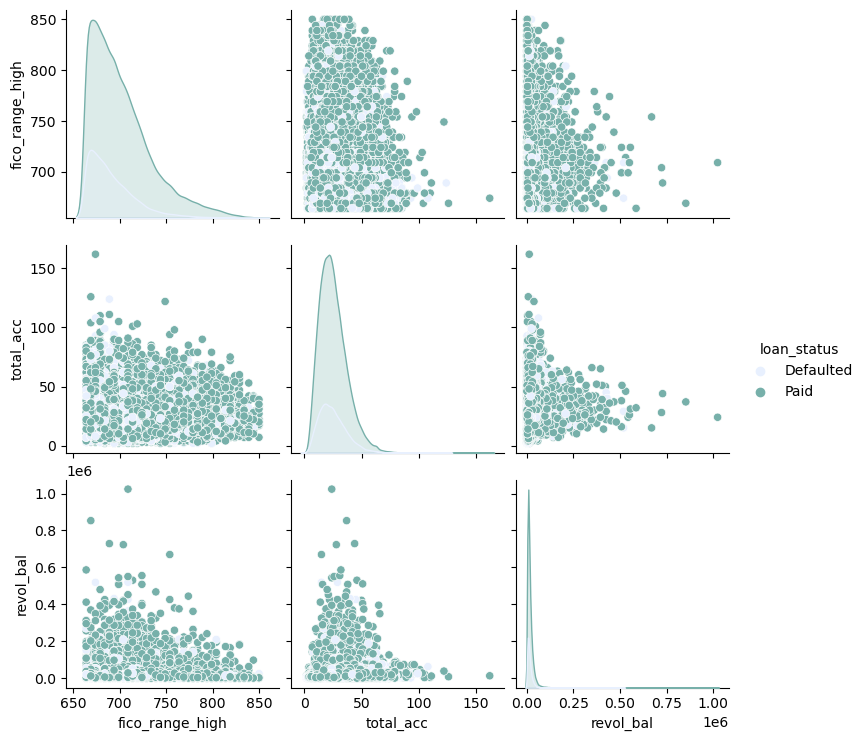

In [17]:
#pairplot
plt.figure(figsize=(15,2))
sns.pairplot(df_train[["fico_range_high","total_acc","revol_bal","loan_status"]],hue="loan_status",palette=["#E8F0FE","#77B0AA"])

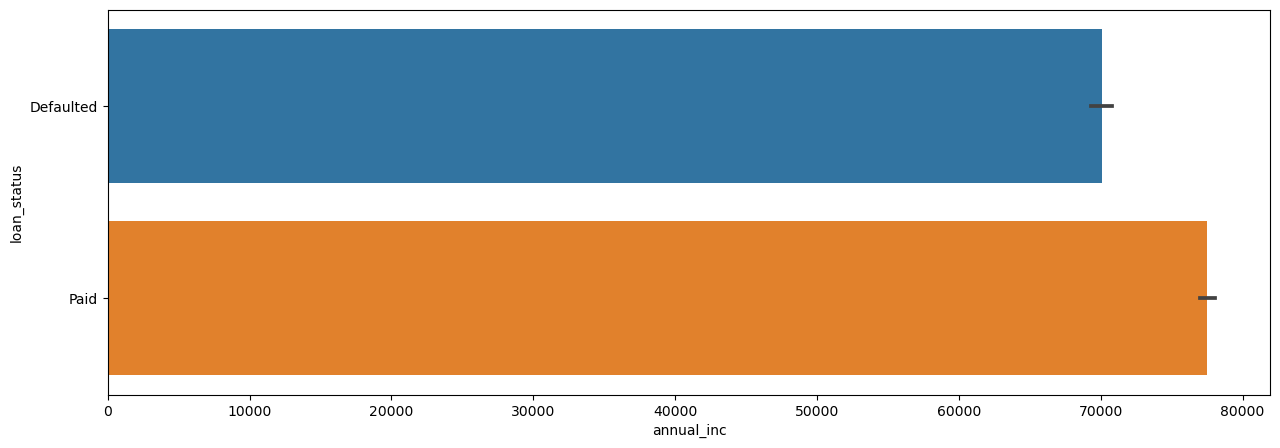

In [18]:
## annual_inc vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df_train,x="annual_inc",y="loan_status")
plt.show()

##### `People with more annual income have paid the loan`

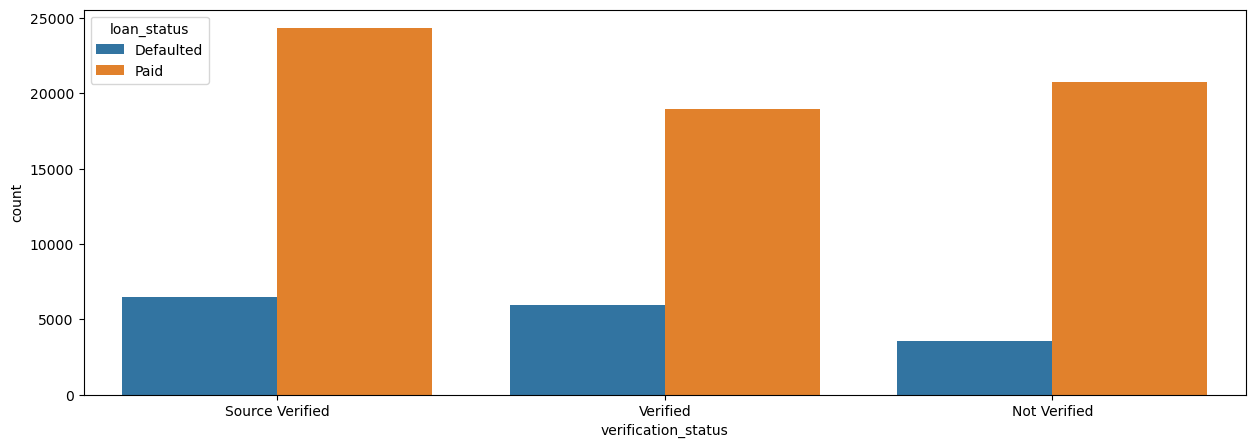

In [19]:
# verification_status count
plt.figure(figsize=(15,5))
sns.countplot(data=df_train,x="verification_status",hue="loan_status")
plt.show()

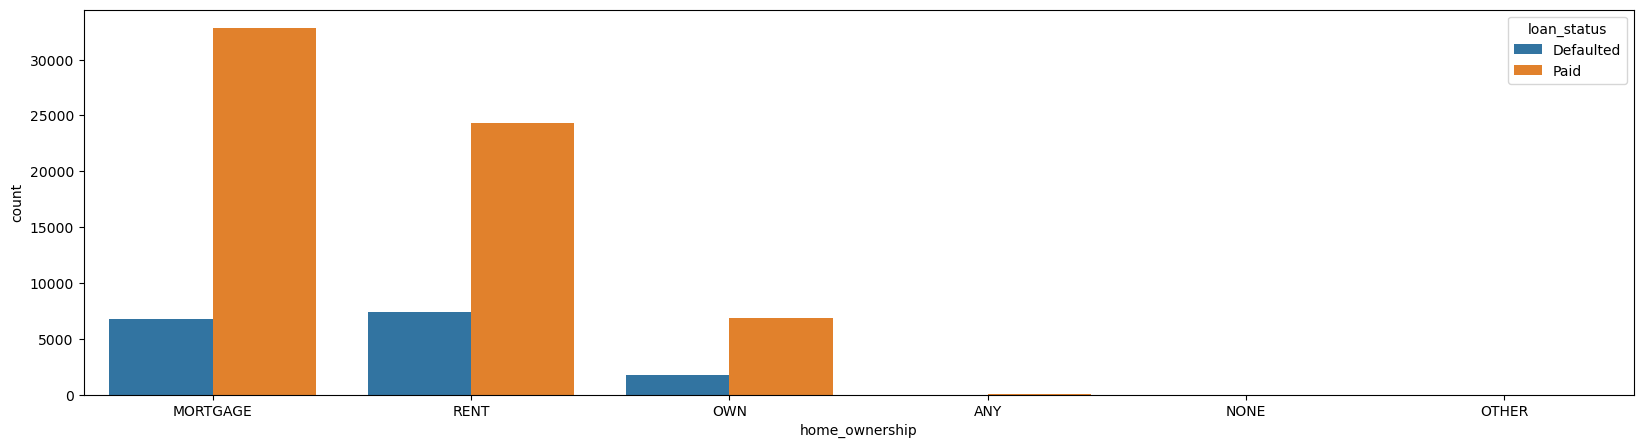

In [20]:
# countplot of home_ownership
plt.figure(figsize=(20,5))
sns.countplot(data=df_train,x="home_ownership",hue="loan_status")
plt.show()

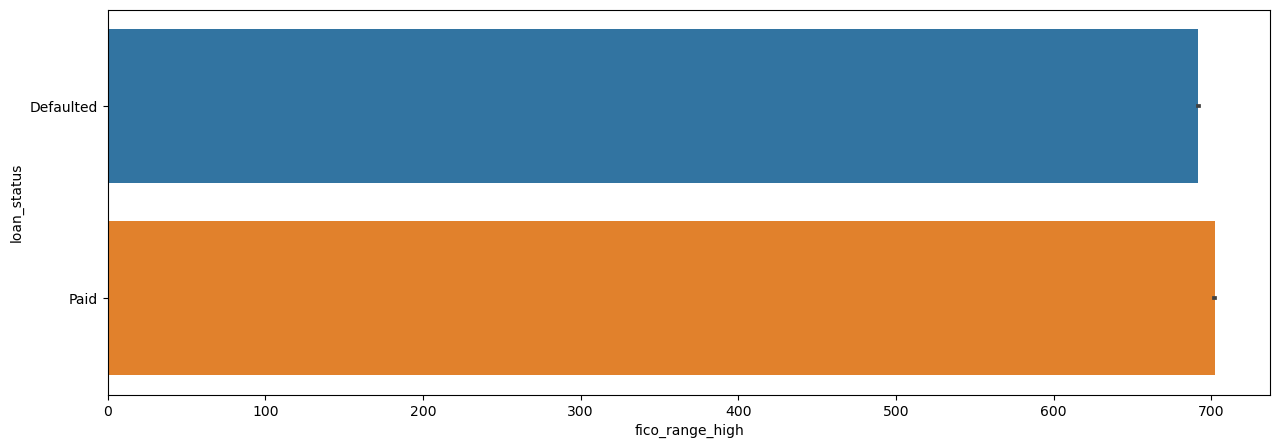

In [21]:
# fico_range_high vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df_train,x="fico_range_high",y="loan_status")
plt.show()

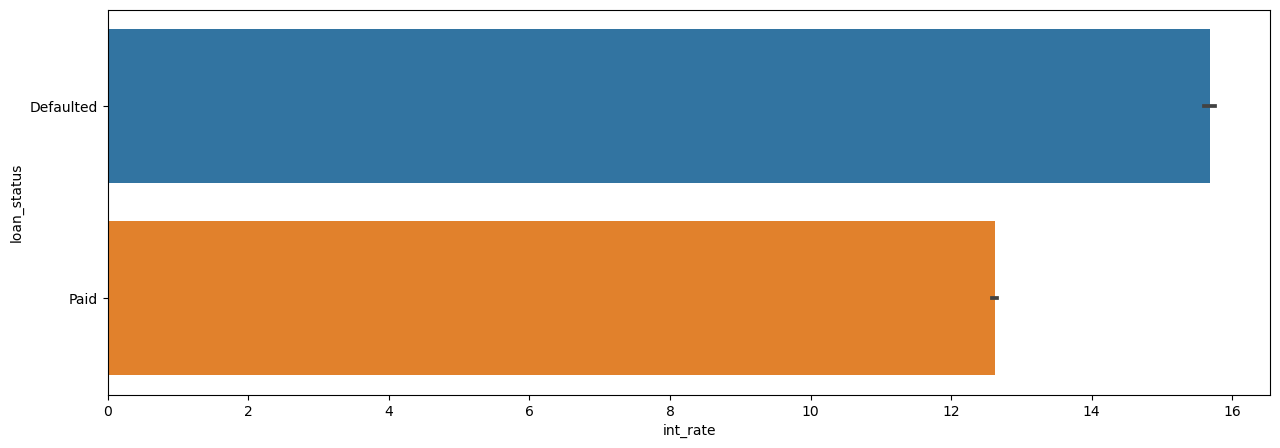

In [22]:
# int_rate vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df_train,x="int_rate",y="loan_status")
plt.show()

##### `People who have taken loan on high interest rate have not paid the loan.`

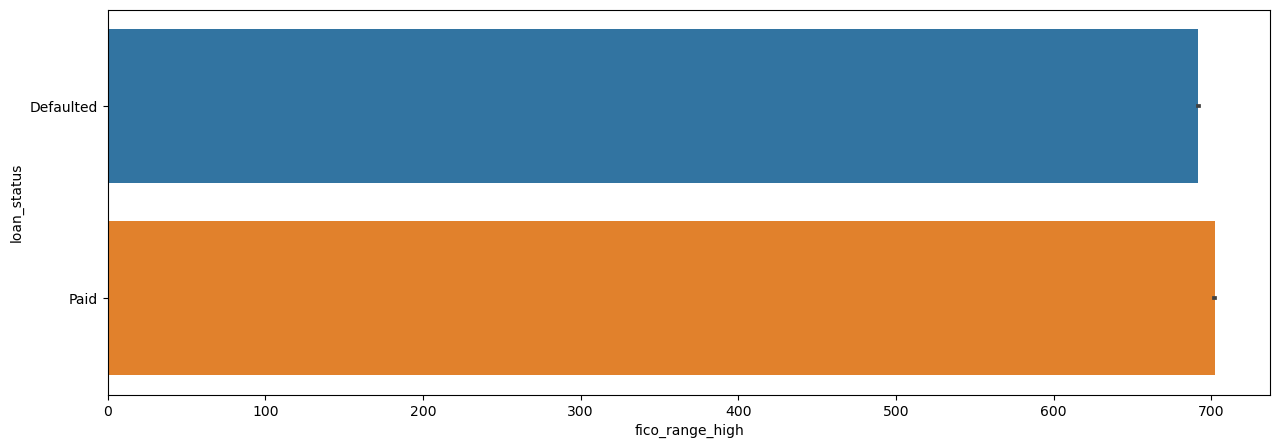

In [23]:
# fico_range_high vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df_train,x="fico_range_high",y="loan_status")
plt.show()

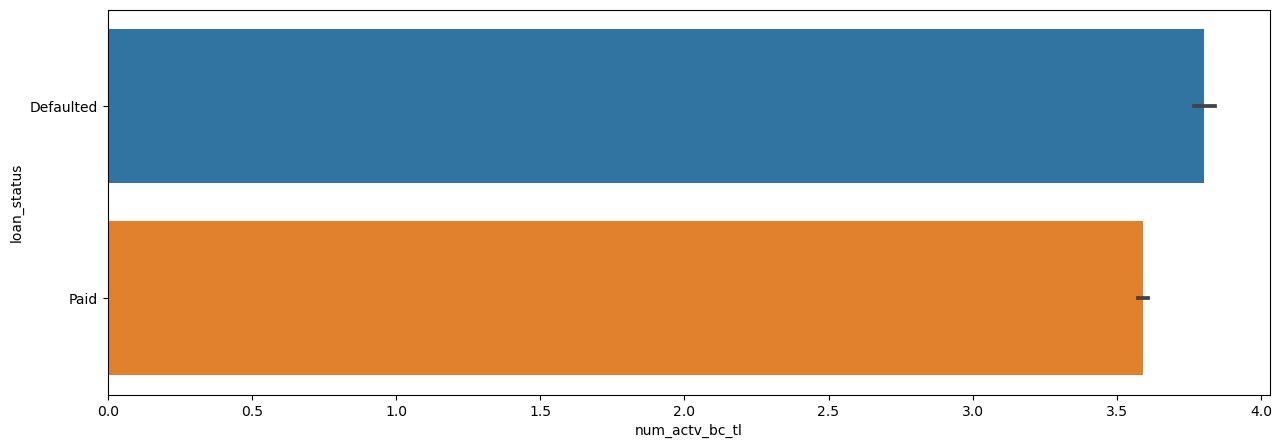

In [24]:
# num_actv_bc_tl vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df_train,x="num_actv_bc_tl",y="loan_status")
plt.show()

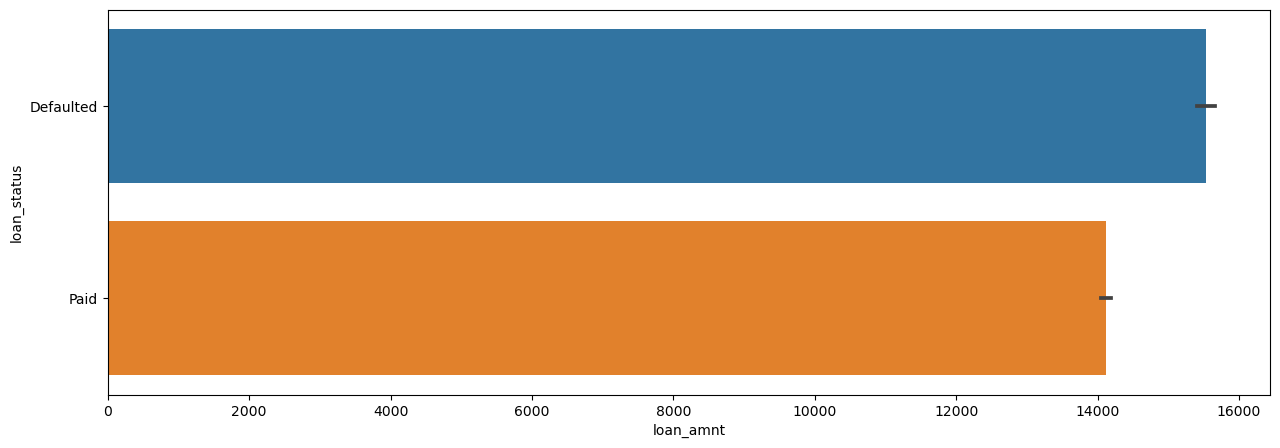

In [25]:
# loan_amnt vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df_train,x="loan_amnt",y="loan_status")
plt.show()

##### `People whose loan amount is less has paid their loan.`

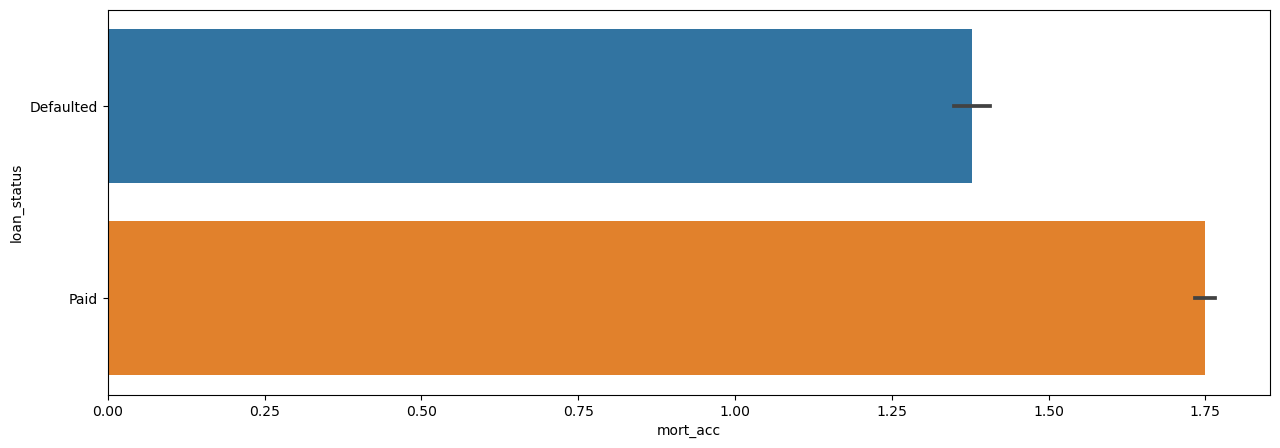

In [26]:
# mort_acc vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df_train,x="mort_acc",y="loan_status")
plt.show()

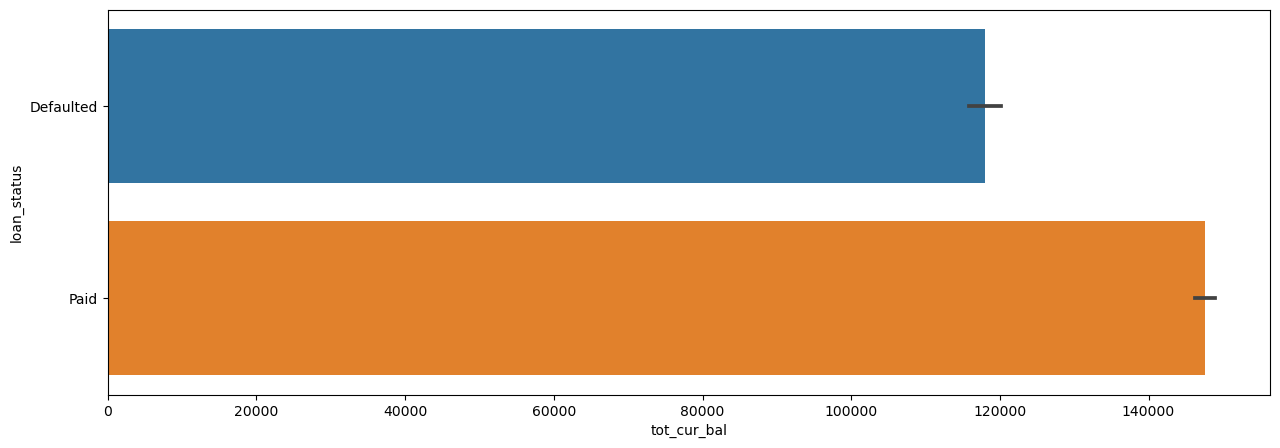

In [27]:
# tot_cur_bal vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df_train,x="tot_cur_bal",y="loan_status")
plt.show()

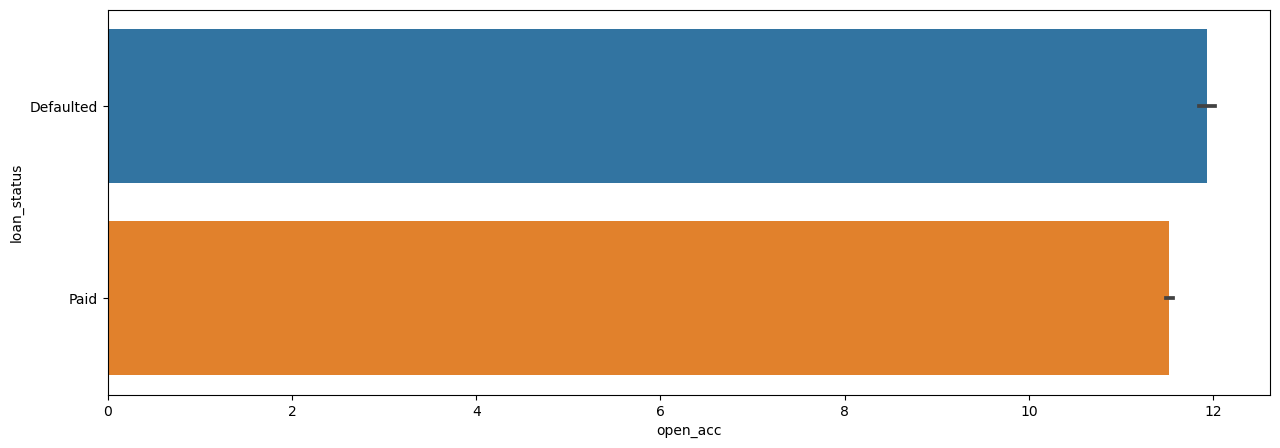

In [28]:
# open_acc vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df_train,x="open_acc",y="loan_status")
plt.show()

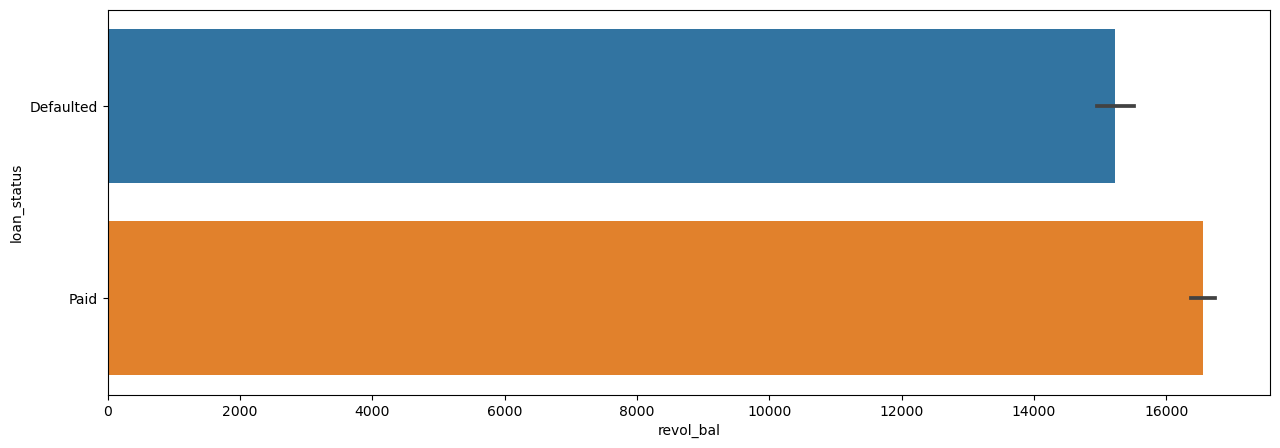

In [29]:
# revol_bal vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df_train,x="revol_bal",y="loan_status")
plt.show()

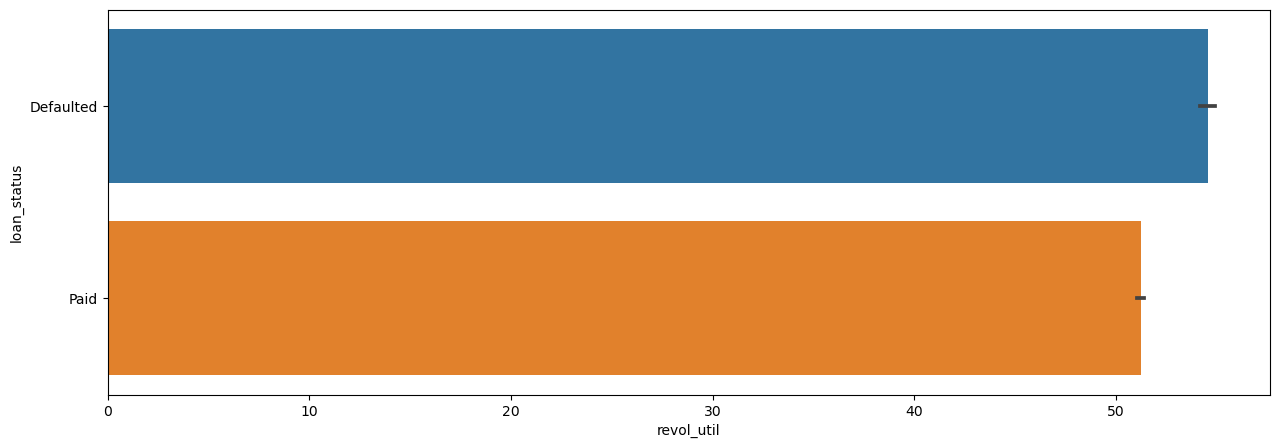

In [30]:
# revol_util vs  loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df_train,x="revol_util",y="loan_status")
plt.show()

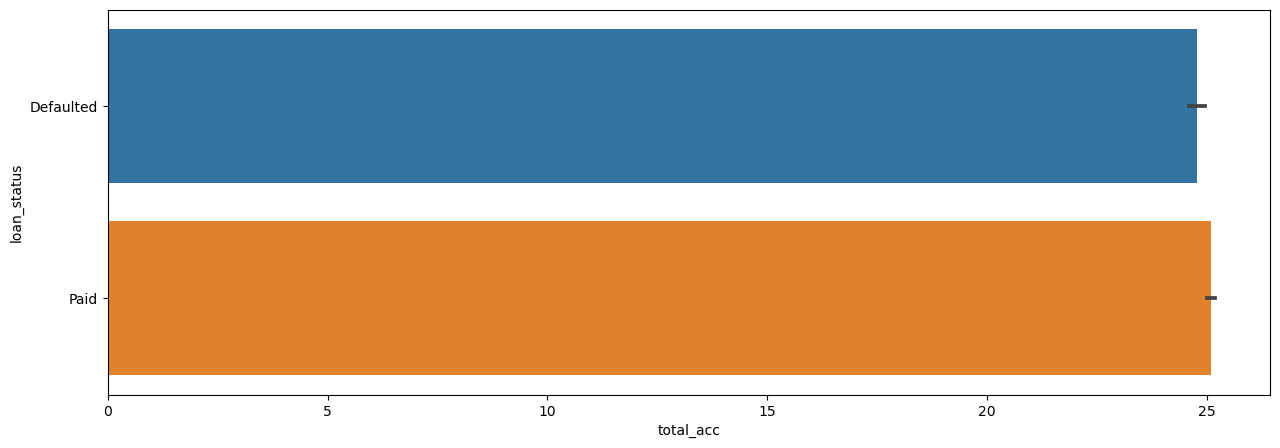

In [31]:
# total_acc vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df_train,x="total_acc",y="loan_status")
plt.show()

#### Histogram for all columns

array([[<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'fico_range_high'}>,
        <Axes: title={'center': 'fico_range_low'}>,
        <Axes: title={'center': 'int_rate'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'num_actv_bc_tl'}>,
        <Axes: title={'center': 'mort_acc'}>,
        <Axes: title={'center': 'tot_cur_bal'}>],
       [<Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'pub_rec_bankruptcies'}>,
        <Axes: title={'center': 'revol_bal'}>],
       [<Axes: title={'center': 'revol_util'}>,
        <Axes: title={'center': 'total_acc'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1500x500 with 0 Axes>

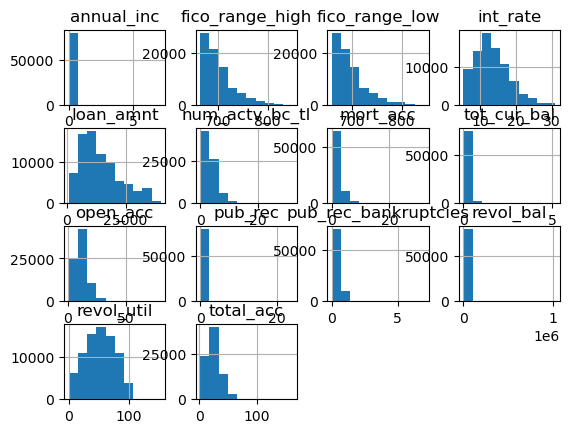

In [32]:
plt.figure(figsize=(15,5))
df_train.hist()



# <p id="1" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #7AA2E3; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3.4: Missing Value Treatment</p>

In [33]:
# missing values in train data
pd.DataFrame(df_train.isnull().sum())

,0
addr_state,0
annual_inc,0
earliest_cr_line,0
emp_length,4588
emp_title,5018
fico_range_high,0
fico_range_low,0
grade,0
home_ownership,0
application_type,0


In [34]:
# Percentage of missing values for train data
missing_values_percentage=df_train.isnull().sum()/len(df_train)*100
missing_values_percentage[missing_values_percentage>0]

emp_length              5.73500
emp_title               6.27250
num_actv_bc_tl          4.93500
mort_acc                3.46375
tot_cur_bal             4.93500
pub_rec_bankruptcies    0.03875
revol_util              0.06625
title                   1.21250
dtype: float64

In [35]:
# percentage of missing values for test data
missing_value_percentage_test=df_test.isnull().sum()/len(df_train)*100
missing_value_percentage_test[missing_value_percentage_test>0]

emp_length              1.57250
emp_title               1.72250
num_actv_bc_tl          1.26375
mort_acc                0.88000
tot_cur_bal             1.26375
pub_rec_bankruptcies    0.01375
revol_util              0.01625
title                   0.30875
dtype: float64

### emp_title

In [36]:
df_train.drop(columns=['emp_title'],axis=1, inplace=True)
df_test.drop(columns=['emp_title'],axis=1, inplace=True)

### num_actv_bc_tl

In [37]:
# num_actv_bc_tl
df_train['num_actv_bc_tl'].fillna(0, inplace=True)
df_test['num_actv_bc_tl'].fillna(0, inplace=True)

### emp_length 

In [38]:
df_train.drop('emp_length', axis=1, inplace=True)
df_test.drop('emp_length', axis=1, inplace=True)

### tol_cur_bal

In [39]:
# tot_cur_bal
# Filling the missing values with the calculated median


# Training Dataset
median_tot_cur_bal = df_train['tot_cur_bal'].median()
df_train['tot_cur_bal'].fillna(median_tot_cur_bal, inplace=True)

# Testing Dataset
median_tot_cur_bal = df_test['tot_cur_bal'].median()
df_test['tot_cur_bal'].fillna(median_tot_cur_bal, inplace=True)


In [40]:
# dropping missing values from test and train data
df_train.dropna(axis=0,inplace=True)
df_test.dropna(axis=0,inplace=True)

In [41]:
# After droping the missing values
print(df_train.shape)
print(df_test.shape)

(76212, 26)
(19037, 25)


In [42]:
# cleaned train data
df_train.head()

,addr_state,annual_inc,earliest_cr_line,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,744,740,E,MORTGAGE,Individual,w,18.99,18075,1.0,1.0,319479.0,7,0,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,724,720,B,RENT,Individual,w,10.16,8800,4.0,0.0,19944.0,5,0,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,679,675,B,MORTGAGE,Individual,w,11.47,18000,4.0,2.0,23199.0,7,0,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,664,660,B,MORTGAGE,Individual,w,9.16,20000,4.0,1.0,72651.0,12,0,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,669,665,F,RENT,Individual,f,23.83,35000,14.0,7.0,64631.0,23,0,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [43]:
df_test.head()

,addr_state,annual_inc,earliest_cr_line,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,719.0,715.0,C,OWN,Individual,f,13.99,5000.0,1.0,0.0,33395.0,9.0,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,684.0,680.0,B,RENT,Individual,f,10.99,30000.0,2.0,2.0,229832.0,11.0,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,679.0,675.0,B,MORTGAGE,Individual,w,10.15,16000.0,5.0,2.0,181616.0,15.0,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,674.0,670.0,C,RENT,Individual,f,13.68,10000.0,6.0,0.0,30603.0,12.0,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,704.0,700.0,B,MORTGAGE,Individual,f,14.09,4000.0,2.0,4.0,124597.0,8.0,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified


<Axes: >

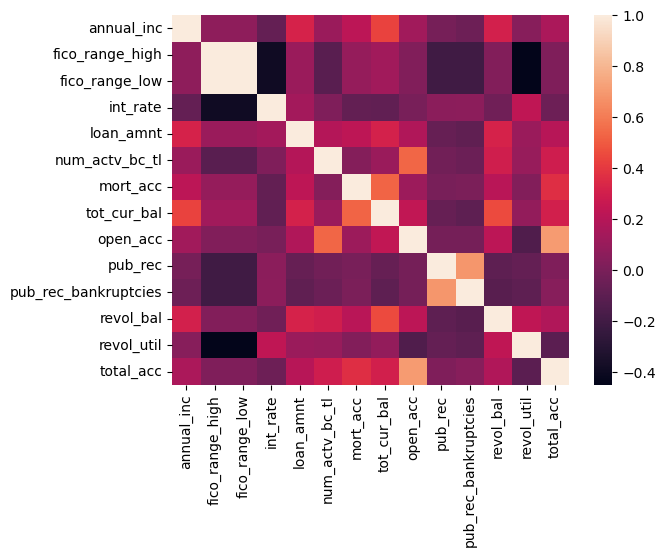

In [44]:
#heat map
sns.heatmap(df_train.corr())

# <p id="1" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #7AA2E3; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3.5: Outliers Treatment</p>

In [46]:
def outlier_treatment(dataframe):
    Q1=dataframe.quantile(0.25)
    Q3=dataframe.quantile(0.75)
    IQR=Q3-Q1

    df_rem_out=dataframe[~((dataframe<(Q1-1.5*IQR))|(dataframe>(Q3+1.5*IQR))).any(axis=1)]
    
    return df_rem_out
 
df=outlier_treatment(df_train)       

In [47]:
#  test data
def outlier_treatment(dataframe):
    Q1=dataframe.quantile(0.25)
    Q3=dataframe.quantile(0.75)
    IQR=Q3-Q1

    df_test_rem_out=dataframe[~((dataframe<(Q1-1.5*IQR))|(dataframe>(Q3+1.5*IQR))).any(axis=1)]
    
    return df_test_rem_out
 
df_test=outlier_treatment(df_test)

In [48]:
# shpae of data after removing the outliers
print(df_train.shape)
print(df_test.shape)

(76212, 26)
(12498, 25)




# <p id="1" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #7AA2E3; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3.6: Encoding</p>

<div style="background-color:#E8F0FE ; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <p><strong>Categorization of Features for Encoding:</strong></p>
    <ul style="list-style-type: square; color: #004085;">
    <p>After analyzing the dataset, we can categorize the features into three groups:</p>
    <ol>
        <li><strong>No Encoding Needed:</strong> These are the features that do not require any form of encoding because they are already in a numerical format that can be fed into a model.</li>
        <li><strong>One-Hot Encoding:</strong> This is required for nominal variables, which are categorical variables without any intrinsic order. One-hot encoding converts each unique value of the feature into a separate column with a 1 or 0, indicating the presence of that value.</li>
        <li><strong>Label Encoding:</strong> This is used for ordinal variables, which are categorical variables with a meaningful order. Label encoding assigns a unique integer to each category in the feature, maintaining the order of the values.</li>
    </ol>
    </ul>
</div>

In [66]:
df_train=df_train.drop(["addr_state","fico_range_high","sub_grade"],axis=1)

In [67]:
df_test=df_test.drop(["addr_state","fico_range_high","sub_grade"],axis=1)

In [68]:
df_train.dtypes

annual_inc              float64
earliest_cr_line         object
fico_range_low            int64
grade                    object
home_ownership           object
application_type         object
initial_list_status      object
int_rate                float64
loan_amnt                 int64
num_actv_bc_tl          float64
mort_acc                float64
tot_cur_bal             float64
open_acc                  int64
pub_rec                   int64
pub_rec_bankruptcies    float64
purpose                  object
revol_bal                 int64
revol_util              float64
term                     object
title                    object
total_acc                 int64
verification_status      object
loan_status              object
dtype: object

<div style="background-color: #E8F0FE; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>No Encoding Needed:</h3>
    <ul>
        <li>annual_inc</li>
        <li>earliest_cr_line</li>
        <li>int_rate</li>
        <li>loan_amnt</li>
        <li>num_actv_bc_tl</li>
        <li>mort_acc</li>
        <li>tot_cur_bal</li>
        <li>open_acc</li>
        <li>pub_rec</li>
        <li>pub_rec_bankruptcies</li>
        <li>revol_bal</li>
        <li>revol_util</li>
        <li>term</li>
        <li>total_acc</li>
     </ul>
    <h3>One-Hot Encoding:</h3>
    <ul>
        <li>home_ownership</li>
        <li>application_type</li>
        <li>initial_list_status</li>
        <li>verification_status</li>
        <li>region</li>
        <li>purpose_category</li>
     </ul>
    <h3>Label Encoding:</h3>
    <ul>
        <li>loan_status</li>
        <li>grade</li>
        <li>fico_score_category</li>
     </ul>    
</div>     
          

In [76]:
# Separating the numerical and categorical columns
def data_type(df_train):
    numerical = []
    categorical = []
    for i in df_train.columns:
        if df_train[i].dtype == 'int64' or df_train[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(df_train)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df_train):
    binary_cols = []
    for col in df_train.select_dtypes(include=['int', 'float']).columns:
        unique_values = df_train[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(df_train)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(df_train, categorical):
    for i in categorical:
        df_train[i] = df_train[i].astype('category')
        df_train[i] = df_train[i].cat.codes
    return df_train

df = encoding(df_train, categorical)

In [77]:
#for test dataset
# Separating the numerical and categorical columns
def data_type(df_test):
    numerical = []
    categorical = []
    for i in df_test.columns:
        if df_test[i].dtype == 'int64' or df_test[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(df_test)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df_test):
    binary_cols = []
    for col in df_test.select_dtypes(include=['int', 'float']).columns:
        unique_values = df_test[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(df_test)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(df_test, categorical):
    for i in categorical:
        df_test[i] = df_test[i].astype('category')
        df_test[i] = df_test[i].cat.codes
    return df_test

df_test = encoding(df_test, categorical)

In [78]:
df_train.head()

,annual_inc,earliest_cr_line,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,term,title,total_acc,verification_status,loan_status
0,85000.0,318,740,4,1,0,1,18.99,18075,1.0,1.0,319479.0,7,0,0.0,2,5338,93.6,1,1177,8,1,0
1,40000.0,40,720,1,5,0,1,10.16,8800,4.0,0.0,19944.0,5,0,0.0,2,19944,60.3,0,829,12,2,1
2,60000.0,60,675,1,1,0,1,11.47,18000,4.0,2.0,23199.0,7,0,0.0,2,23199,88.5,0,1177,16,1,1
3,100742.0,617,660,1,1,0,1,9.16,20000,4.0,1.0,72651.0,12,0,0.0,2,18425,69.0,0,1177,19,1,1
4,80000.0,320,665,5,5,0,0,23.83,35000,14.0,7.0,64631.0,23,0,0.0,2,34370,90.0,1,1000,59,2,1


In [79]:
df_test.head()

,annual_inc,earliest_cr_line,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,term,title,total_acc,verification_status
0,50000.0,399,715.0,2,2,0,0,13.99,5000.0,1.0,0.0,33395.0,9.0,0.0,0.0,2,2568.0,9.8,0,327,11.0,1
1,92000.0,119,680.0,1,3,0,0,10.99,30000.0,2.0,2.0,229832.0,11.0,0.0,0.0,2,30394.0,75.4,0,327,35.0,1
2,89000.0,332,675.0,1,1,0,1,10.15,16000.0,5.0,2.0,181616.0,15.0,0.0,0.0,1,38400.0,75.3,1,233,41.0,0
4,35580.0,158,700.0,1,1,0,0,14.09,4000.0,2.0,4.0,124597.0,8.0,0.0,0.0,2,3471.0,39.4,0,3,19.0,2
5,32510.0,74,720.0,1,1,0,1,9.17,14950.0,5.0,0.0,15111.0,15.0,0.0,0.0,2,15111.0,41.4,0,327,25.0,0




# <p id="1" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #7AA2E3; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3.7: Feature Scaling</p>


In [80]:
## feature scaling for train data
from sklearn.preprocessing import StandardScaler

def feature_scaling(df_train, numerical):
    sc_x = StandardScaler()
    df[numerical] = sc_x.fit_transform(df_train[numerical])
    return df

df = feature_scaling(df_train, numerical)

In [81]:
# for test data
## feature scaling 

from sklearn.preprocessing import StandardScaler

def feature_scaling(df_test, numerical):
    sc_x = StandardScaler()
    df_test[numerical] = sc_x.fit_transform(df_test[numerical])
    return df_test

df_test = feature_scaling(df_test, numerical)



# <p  style=" padding: 14px; font-size: 20px; background-color:#E8F0FE; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">        Checking Imbalanced Data</p>

In [82]:
# counts of categories in loan_status
df_train.loan_status.value_counts()

1    60938
0    15274
Name: loan_status, dtype: int64

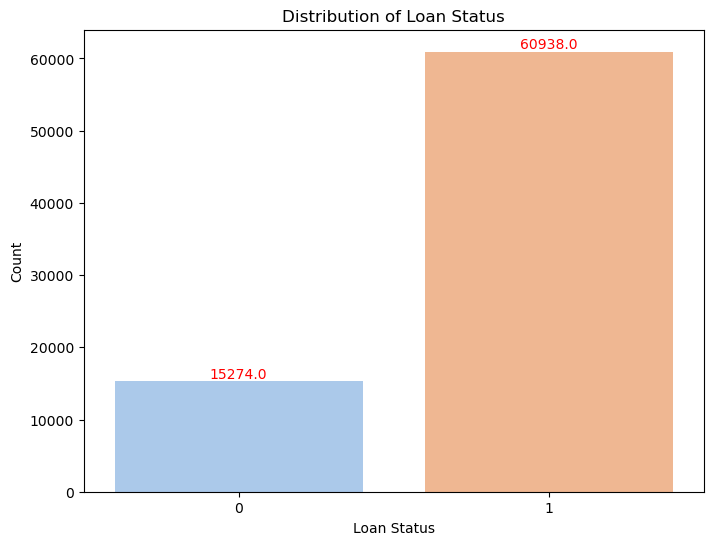

In [89]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='loan_status', data=df_train, palette='pastel')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='red', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

<div style="background-color: #F5EEE6; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <ul style="list-style-type: square; color: #004085;">
    The bar plot shows the percentage of defaulted and paid in the dataset. Approximately 39554 of the loan status was paid, and 9679 were defaulted. This indicates that there is high imbalance in the target variable.
    To address this, we will use <b>SMOTE (Synthetic Minority Over-sampling Technique)</b>. SMOTE is a technique used to generate synthetic samples for the minority class in order to balance the class distribution in the dataset. By creating synthetic samples, SMOTE helps mitigate the impact of class imbalance and improves the performance of machine learning models in predicting the minority class.
    </ul>
</div>

In [90]:
#no. of columns in train data
len(df_train.columns)

23

In [91]:
# No. of columns in test data
len(df_test.columns)

22


# <p  style=" padding: 14px; font-size: 18px; color: #1A202C; background-color: #E8F0FE; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);"> Handling Imbalanced Data</p>

In [100]:
from imblearn.over_sampling import SMOTE
sm = SMOTE (sampling_strategy='minority', random_state=42)

# Fitting the model to generate the data.
oversampled_X, oversampled_Y = sm. fit_resample(df.drop('loan_status', axis=1), df_train['loan_status'])
oversampled = pd. concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)],axis=1)

In [93]:
oversampled

,loan_status,annual_inc,earliest_cr_line,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,term,title,total_acc,verification_status
0,0,0.122425,318,1.416571,4,1,0,1,1.193513,0.408828,-1.127825,-0.337675,1.127839,-0.852462,0,0.000000,2,-0.483903,1.707203,1,1177,-1.424572,1
1,1,-0.520934,40,0.780943,1,5,0,1,-0.648629,-0.654033,0.183446,-0.835873,-0.764404,-1.215884,0,0.000000,2,0.153947,0.341401,0,829,-1.092294,2
2,1,-0.234997,60,-0.649221,1,1,0,1,-0.375333,0.400233,0.183446,0.160522,-0.743841,-0.852462,0,0.000000,2,0.296094,1.498026,0,1177,-0.760017,1
3,1,0.347487,617,-1.125942,1,1,0,1,-0.857252,0.629421,0.183446,-0.337675,-0.431440,0.056093,0,0.000000,2,0.087611,0.698232,0,1177,-0.510809,1
4,1,0.050941,320,-0.967035,5,5,0,0,2.203249,2.348333,4.554349,2.651510,-0.482104,2.054914,0,0.000000,2,0.783936,1.559549,1,1000,2.811964,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121871,0,-0.193081,623,-0.808128,1,1,0,1,-0.149244,-0.094490,0.972267,-0.039930,-0.586240,0.256617,0,0.298823,2,-0.251938,0.136817,1,1177,-0.171888,1
121872,0,0.165765,144,-0.201285,1,5,0,0,-0.513472,0.284532,0.792625,-0.835873,0.014179,1.140648,0,0.000000,2,0.666854,0.064106,0,1177,1.185894,1
121873,0,0.238733,208,-1.035749,3,5,0,0,0.781225,0.908933,0.183446,-0.835873,-0.564472,0.237804,0,0.000000,2,-0.135130,0.603734,0,1177,-0.747671,1
121874,0,-0.034405,423,0.377535,1,1,0,1,-0.486709,0.363198,-0.596561,-0.337675,-0.373208,-0.066892,3,3.676816,1,0.368586,0.252330,1,881,0.144797,0


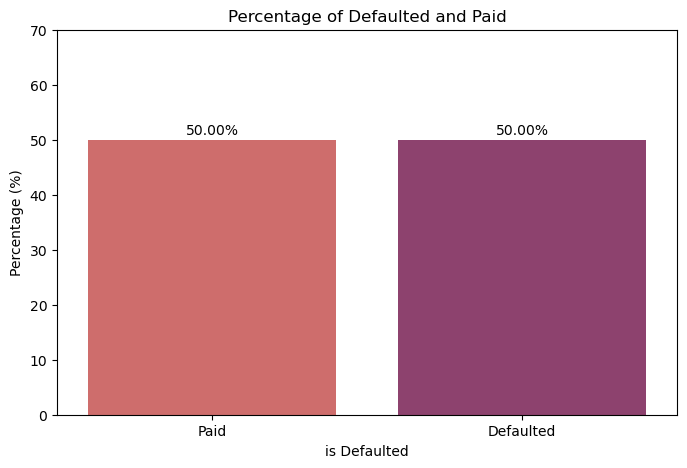

In [94]:
# Calculating the percentage of each class
percentage = oversampled['loan_status'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette="flare")
plt.title('Percentage of Defaulted and Paid')
plt.xlabel('is Defaulted')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Paid','Defaulted'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

In [95]:
oversampled.loan_status.value_counts()

0    60938
1    60938
Name: loan_status, dtype: int64

# <p id="1" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #E9A89B; font-size: 20px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">4: Splitting the Training Dataset</p>

In [96]:
#input and output variables
X=oversampled.drop(["loan_status"],axis=1)
y=oversampled["loan_status"]

In [97]:
# split the data into train and validation data
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

# <p id="1" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #E9A89B; font-size: 20px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">5: Model Building</p>

- Logistic Regression Model<br>
- KNearest Neighbour Model<br>
- Xgboost

# <p id="1" style="text-align: center; padding: 15px; background-color: #C0D6E8; font-size: 18px; border-radius: 10px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);"> Logistic Regression Model</p>

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [101]:
prediction=logistic.predict(X_val)
prediction

array([1, 1, 0, ..., 1, 0, 0], dtype=int8)

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix

# confusion matrix
cm1=confusion_matrix(y_val,prediction)
cm1

array([[7754, 4260],
       [4040, 8322]], dtype=int64)

In [103]:
# calculating the accuracy
accuracy_score(y_val,prediction)

0.6595011486708238

In [104]:
# ACCURACY OF Logistic Regression
from sklearn import metrics
accuracyList=[]
modelList=[]

# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_val,prediction))
accuracyList.append(metrics.accuracy_score(y_val, prediction))
modelList.append("Logistic Regression")

Accuracy: 0.6595011486708238


In [105]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm1
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precisionList=[]
recallList=[]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))

precision 0.6614210777300906
recall 0.6731920401229574


<div style="background-color: #C0D6E8 ; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>Logistic Regression Model Evaluation </h3>
    <ul style="list-style-type: square; color: #004085;">
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Interpretation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>65.91%</td>
            <td>The model correctly predicted loan statuses for 65.91% of the cases.</td>
        </tr>
        <tr>
            <td>Precision (Defaulted)</td>
            <td>66.14%</td>
            <td>Out of all loans predicted as defaulted, only 66.14% were actually defaulted.</td>
        </tr>
        <tr>
            <td>Recall (Defaulted)</td>
            <td>67.31%</td>
            <td>The model identified 67% of the actual defaulted loans.</td>
        </tr>
      </table>
    
   <p>
       The evaluation of the Logistic Regression model in the loan domain reveals its performance in predicting defaulted loans. While it achieved an accuracy of 66%, indicating overall correctness. </p>
    </ul>

</div>


## Target Prediction for Test Data

In [106]:
y_predic_test=logistic.predict(df_test)
y_predic_test

array([1, 1, 1, ..., 1, 0, 0], dtype=int8)

In [107]:
# Create a DataFrame from y_predic_test with column name "predicted_loan_status"
predictions_df_test = pd.DataFrame(data=y_predic_test, columns=["predicted_loan_status"])

LR_result_df_test = pd.concat([df_test.reset_index(drop=True), predictions_df_test], axis=1)

In [108]:
LR_result_df_test.head()

,annual_inc,earliest_cr_line,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,term,title,total_acc,verification_status,predicted_loan_status
0,-0.532207,399,0.780829,2,2,0,0,0.166897,-1.067944,-1.233969,-0.817368,-0.740337,-0.409355,0.0,0.0,2,-1.158210,-1.864998,0,327,-1.164103,1,1
1,0.940040,119,-0.546099,1,3,0,0,-0.519511,2.021719,-0.708459,0.356419,1.092319,0.025135,0.0,0.0,2,1.893534,0.921509,0,327,1.140151,1,1
2,0.834880,332,-0.735661,1,1,0,1,-0.711705,0.291507,0.868071,0.356419,0.642489,0.894114,0.0,0.0,1,2.771571,0.917261,1,233,1.716214,0,1
3,-1.037678,158,0.212145,1,1,0,0,0.189778,-1.191531,-0.708459,1.530205,0.110530,-0.626599,0.0,0.0,2,-1.059176,-0.607672,0,3,-0.396019,2,1
4,-1.145293,74,0.970390,1,1,0,1,-0.935931,0.161742,0.868071,-0.817368,-0.910918,0.894114,0.0,0.0,2,0.217411,-0.522717,0,327,0.180045,0,1


# <p id="1" style="text-align: center; padding: 15px; background-color: #C0D6E8; font-size: 18px; border-radius: 10px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);"> K Nearest Neighbour (KNN) Model</p>

In [109]:
#Applying the K-Nearest Neighbour on the training dataset
from sklearn.neighbors import KNeighborsClassifier
knnmodel_ini = KNeighborsClassifier()
knnmodel_ini.fit(X_train,y_train)

KNeighborsClassifier()

In [110]:
#Running the model on the test dataset
y_pred_ini = knnmodel_ini.predict(X_val)
y_pred_ini

array([0, 0, 0, ..., 1, 1, 0], dtype=int8)

In [111]:
#Importing all the functions to for checking the accuracies
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,roc_curve, accuracy_score, log_loss

In [112]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_val,y_pred_ini)

0.7424926156875615

In [113]:
#Using confusion matrix we are checking the accuracy on the testing dataset

cm1=confusion_matrix(y_val,y_pred_ini)
cm1

array([[11199,   815],
       [ 5462,  6900]], dtype=int64)

In [114]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm1
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))

precision 0.8943616331821128
recall 0.5581621096909886


In [115]:
# ACCURACY OF KNN(validation dataset)
from sklearn import metrics

# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_ini))
accuracyList.append(metrics.accuracy_score(y_val, y_pred_ini))
modelList.append("KNN")

Accuracy: 0.7424926156875615


<div style="background-color: #C0D6E8; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>KNN Model Evaluation </h3>
    <ul style="list-style-type: square; color: #004085;">
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Interpretation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>74.24%</td>
            <td>The model correctly predicted loan statuses for 74.24% of the cases.</td>
        </tr>
        <tr>
            <td>Precision (Defaulted)</td>
            <td>89.43%</td>
            <td>Out of all loans predicted as defaulted, only 89.43% were actually defaulted.</td>
        </tr>
        <tr>
            <td>Recall (Defaulted)</td>
            <td>55.81%</td>
            <td>The model identified 56% of the actual defaulted loans.</td>
        </tr>
      </table>
    </ul>
</div>


In [116]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]
# Classification Report

print(classification_report(y_val,knnmodel_ini.predict(X_val),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.67      0.93      0.78     12014
 Positive(1)       0.89      0.56      0.69     12362

    accuracy                           0.74     24376
   macro avg       0.78      0.75      0.73     24376
weighted avg       0.78      0.74      0.73     24376



In [117]:
#Using Logloss we are checking the accuracy on the testing dataset
log_loss(y_val,knnmodel_ini.predict(X_val))

9.281506905295716

##### Comparing the validation and train data Accuracies


In [118]:
#Storing the predicted values of training dataset in y_pred_train
y_pred_val = knnmodel_ini.predict(X_train)

In [119]:
#Checking the accuracy of training dataset 
accuracy_score(y_train,y_pred_val)

0.8290051282051282

In [120]:
#Checking the accuracy of val dataset
accuracy_score(y_val,y_pred_ini)

0.7424926156875615

#### Hyperparameter Tuning: Finding the best value for K

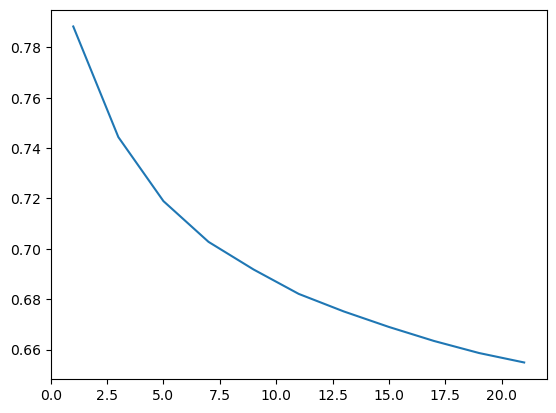

In [121]:
#Using K-fold cross validation technique we will find the best value of K
k_value = [1,3,5,7,9,11,13,15,17,19,21]
from sklearn.model_selection import cross_val_score
cv_score = []

for k in k_value:
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knnmodel, X_train,y_train,cv=3, scoring='accuracy')
    cv_score.append(scores.mean())
    
cv_score
plt.plot(k_value, cv_score)
plt.show()
#The best value of K is coming out to be 11, we will retrain the model with the value of K as 11

In [123]:
#Applying the K-Nearest Neighbour on the training dataset
from sklearn.neighbors import KNeighborsClassifier
knnmodel_tuned = KNeighborsClassifier(n_neighbors=3)
knnmodel_tuned.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [124]:
#Running the model on the test dataset
y_pred_tuned = knnmodel_tuned.predict(X_val)

In [125]:
#Using accuracy score we are checking the accuracy on the validation dataset
accuracy_score(y_val,y_pred_tuned)

0.768788972760092

#### `KNN Model Evaluation after Tuning.Accuracy after Hyperparameter Tuning:77.51%`

### Target prediction For Test Dataset 

In [126]:
y_predic_test_knn=knnmodel_tuned.predict(df_test)
y_predic_test_knn

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [127]:
# Create a DataFrame from y_predic_test with column name "predicted_loan_status"
predictions_df_test_knn = pd.DataFrame(data=y_predic_test_knn, columns=["predicted_loan_status"])

knn_result_df_test = pd.concat([df_test.reset_index(drop=True), predictions_df_test_knn], axis=1)

In [128]:
knn_result_df_test.head()

,annual_inc,earliest_cr_line,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,term,title,total_acc,verification_status,predicted_loan_status
0,-0.532207,399,0.780829,2,2,0,0,0.166897,-1.067944,-1.233969,-0.817368,-0.740337,-0.409355,0.0,0.0,2,-1.158210,-1.864998,0,327,-1.164103,1,1
1,0.940040,119,-0.546099,1,3,0,0,-0.519511,2.021719,-0.708459,0.356419,1.092319,0.025135,0.0,0.0,2,1.893534,0.921509,0,327,1.140151,1,1
2,0.834880,332,-0.735661,1,1,0,1,-0.711705,0.291507,0.868071,0.356419,0.642489,0.894114,0.0,0.0,1,2.771571,0.917261,1,233,1.716214,0,1
3,-1.037678,158,0.212145,1,1,0,0,0.189778,-1.191531,-0.708459,1.530205,0.110530,-0.626599,0.0,0.0,2,-1.059176,-0.607672,0,3,-0.396019,2,1
4,-1.145293,74,0.970390,1,1,0,1,-0.935931,0.161742,0.868071,-0.817368,-0.910918,0.894114,0.0,0.0,2,0.217411,-0.522717,0,327,0.180045,0,1


# <p id="1" style="text-align: center; padding: 15px; background-color: #C0D6E8; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);"> XgBoost</p>

In [129]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [130]:
import xgboost as xgb

In [131]:
#Define the model 
xgb_cal=xgb.XGBClassifier( n_estimators = 10)
xgb_cal

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [132]:
# Fit  from the model
xgb_cal.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [133]:
#predict the model
preds = xgb_cal.predict(X_val)
preds

array([0, 1, 0, ..., 1, 1, 1])

In [134]:
# ACCURACY OF Xgboost
from sklearn import metrics
# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_val, preds))
accuracyList.append(metrics.accuracy_score(y_val, preds))
modelList.append("XGBoost")

Accuracy: 0.8205612077453233


In [135]:
#import the confusion matrix from scikit learn
from sklearn.metrics import confusion_matrix
#create the confusion matrix
cm = confusion_matrix(y_val, preds)
cm

array([[ 9169,  2845],
       [ 1529, 10833]], dtype=int64)

In [136]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))

precision 0.7920017546424916
recall 0.876314512214852


<div style="background-color: #C0D6E8; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>XgBoost Model Evaluation </h3>
    <ul style="list-style-type: square; color: #004085;">
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Interpretation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>82.05%</td>
            <td>The model correctly predicted loan statuses for 82.05% of the cases.</td>
        </tr>
        <tr>
            <td>Precision (Defaulted)</td>
            <td>79.20%</td>
            <td>Out of all loans predicted as defaulted, only 79.20% were actually defaulted.</td>
        </tr>
        <tr>
            <td>Recall (Defaulted)</td>
            <td>87.63%</td>
            <td>The model identified 88% of the actual defaulted loans.</td>
        </tr>
      </table>
    </ul>
</div>

#### Hyperparameter Tuning in XgBoost

In [137]:
# Initialize the XGBoost Classifier using optimal hyperparameters
xgb_tun = xgb.XGBClassifier(max_depth=6,
                        learning_rate=0.05,
                        n_estimators=200,  
                        min_child_weight=2,
                        scale_pos_weight=0.5,
                        subsample=0.9 ,
                        colsample_bytree=0.5,
                        colsample_bylevel=0.8 ,
                        reg_alpha=0.05 ,
                        reg_lambda=0.1 ,
                        max_delta_step=2 ,
                        gamma=0.1,
                        random_state=0)

# fit the XGBoost classifier
xgb_tun.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=6, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

In [138]:
#predict the model
preds_tun = xgb_tun.predict(X_val)
preds_tun

array([0, 1, 0, ..., 1, 1, 0])

In [139]:
accuracy_score(y_val,preds_tun)

0.8164177879881851

In [140]:
#import the confusion matrix from scikit learn
from sklearn.metrics import confusion_matrix
#create the confusion matrix
cm2 = confusion_matrix(y_val, preds_tun)
cm2

array([[10280,  1734],
       [ 2741,  9621]], dtype=int64)

In [141]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm2
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))

precision 0.8472919418758257
recall 0.7782721242517392


<div style="background-color: #C0D6E8; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>XGBoost Model Evaluation (After Tuning)</h3>
    <ul style="list-style-type: square; color: #004085;">
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Interpretation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>81.64%</td>
            <td>The model correctly predicted loan statuses for 82% of the cases.</td>
        </tr>
        <tr>
            <td>Precision (Defaulted)</td>
            <td>84.72%</td>
            <td>Out of all loans predicted as defaulted, only 85% were actually defaulted.</td>
        </tr>
        <tr>
            <td>Recall (Defaulted)</td>
            <td>77.82%</td>
            <td>The model identified 78% of the actual defaulted loans.</td>
        </tr>
    </table>
    </ul>
</div>

## Target Prediction for Test Dataset 

In [142]:
y_test_pred_xg = xgb_tun.predict(df_test)

In [143]:
# Create a DataFrame from y_test_pred_xg with column name "predicted_loan_status"
predictions_df_test_xg = pd.DataFrame(data=y_test_pred_xg, columns=["predicted_loan_status"])

XG_result_df = pd.concat([df_test.reset_index(drop=True), predictions_df_test_xg], axis=1)

In [144]:
XG_result_df.head()

,annual_inc,earliest_cr_line,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,term,title,total_acc,verification_status,predicted_loan_status
0,-0.532207,399,0.780829,2,2,0,0,0.166897,-1.067944,-1.233969,-0.817368,-0.740337,-0.409355,0.0,0.0,2,-1.158210,-1.864998,0,327,-1.164103,1,0
1,0.940040,119,-0.546099,1,3,0,0,-0.519511,2.021719,-0.708459,0.356419,1.092319,0.025135,0.0,0.0,2,1.893534,0.921509,0,327,1.140151,1,0
2,0.834880,332,-0.735661,1,1,0,1,-0.711705,0.291507,0.868071,0.356419,0.642489,0.894114,0.0,0.0,1,2.771571,0.917261,1,233,1.716214,0,0
3,-1.037678,158,0.212145,1,1,0,0,0.189778,-1.191531,-0.708459,1.530205,0.110530,-0.626599,0.0,0.0,2,-1.059176,-0.607672,0,3,-0.396019,2,0
4,-1.145293,74,0.970390,1,1,0,1,-0.935931,0.161742,0.868071,-0.817368,-0.910918,0.894114,0.0,0.0,2,0.217411,-0.522717,0,327,0.180045,0,0


# <p id="1" style="text-align: center; padding: 20px; background-color: #C0D6E8; border-radius: 10px; border: 2px solid #E9A89B; font-size: 23px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">6: Conclusion</p>

In [145]:
# We create a final list to collate all the results so far
finalList= [modelList, accuracyList, precisionList, recallList]
# final dataframe to see all the results.
pd.DataFrame(finalList, index=['Model', 'Accuracy', 'Precision', 'Recall']).T

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.659501,0.661421,0.673192
1,KNN,0.742493,0.894362,0.558162
2,XGBoost,0.820561,0.792002,0.876315


<div style="background-color: #C0D6E8; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h2>Model Performance Evaluation - XGBoost</h2>
    <ul style="list-style-type: square; color: #004085;">
        <li> Accuracy: 82.05%</li>
        <li> Precision: 79.20%</li>
        <li> Recall: 87.63%</li>
       <p>Among all the classifiers models tested, XGBoost demonstrated the best performance in predicting loan defaulters. With an accuracy of 82.05% and a high recall rate of 87.63%, the model effectively identifies instances of defaulters.</p>
    </ul>
</div>

